In [39]:
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(12,8))
%matplotlib inline 

In [2]:
# Read the shapes from the shapefile into a list of shapely geometries.
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

In [4]:
df = pd.read_excel("diversityindex.xlsx")
df.head()

,SCHOOL,LOCATION,STATE,DIVERSITY INDEX
0,University of Hawaii--Hilo,"Hilo, HI",HI,0.77
1,Andrews University,"Berrien Springs, MI",MI,0.76
2,University of Nevada--Las Vegas,"Las Vegas, NV",NV,0.76
3,Rutgers University--Newark,"Newark, NJ",NJ,0.75
4,Stanford University,"Stanford, CA",CA,0.75


In [68]:
ofinterest = "DIVERSITY INDEX"
DATA = df.groupby(["STATE"]).mean()

# We need to map the diversity index to integers so that we can assign each state a color
#
# (1) Rank by state, in which case you need 50 bins for 50 states
#     This looks nice, but the difference between e.g. rank 10 and 9 could be artitrarily bigger than 2 and 1
#     Journalists would enjoy this, probably not scientists.
# n = 50
# DATA.insert(0, "stat", pd.qcut(DATA[ofinterest], q=n, labels=False, **{"duplicates": "drop"}))
# (2) Digitize/bin the states, any number of bins OK
n = 100
DATA.insert(0, "stat", np.digitize(DATA[ofinterest], np.linspace(DATA[ofinterest].min(), DATA[ofinterest].max(), n)))
# DATA.sample(20)

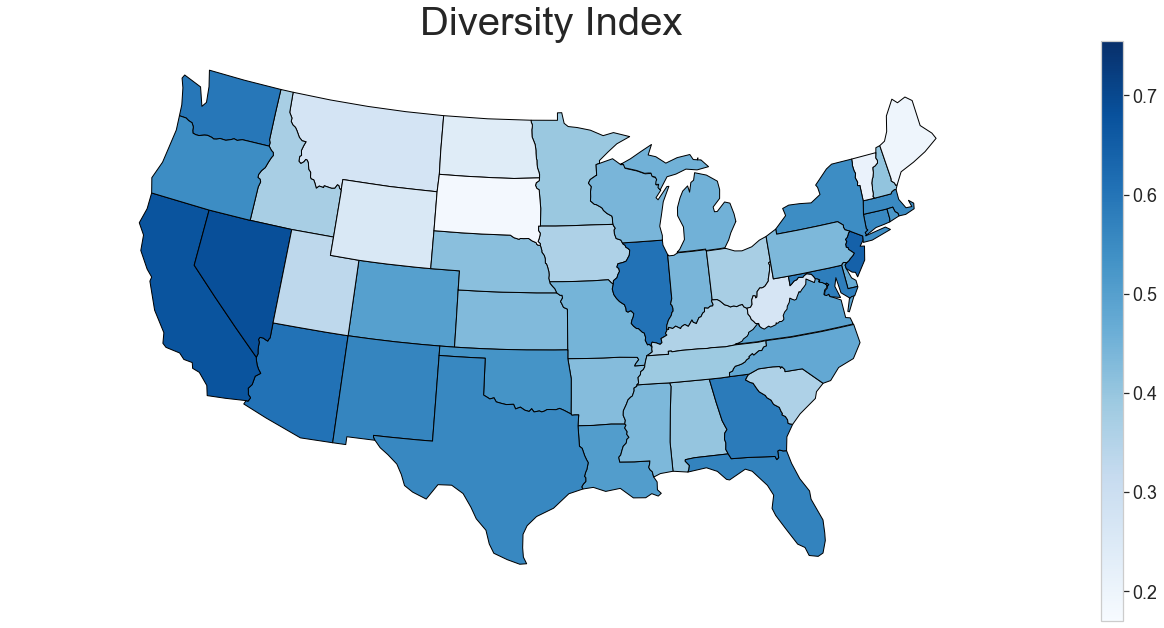

<Figure size 432x288 with 0 Axes>

In [77]:
# cm = 'inferno'
cm = 'Blues'
pal = sns.color_palette(cm, n_colors=n)

# Create the mpl axes of a PlateCarree map
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title(ofinterest.title(), fontsize=40)

for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        facecolor = pal[DATA.loc[astate.attributes["postal"], "stat"]]
    except:
        facecolor = "gray"

#     # simple scheme to assign color to each state
#     if state_dens < 40:
#         facecolor = "lightyellow"
#     elif state_dens > 200:
#         facecolor = "red"
#     else:
#         facecolor = "pink"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="2%", pad=0.1, axes_class=plt.Axes)
norm = mpl.colors.Normalize(vmin=DATA["DIVERSITY INDEX"].min(),vmax=DATA["DIVERSITY INDEX"].max())
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig.add_axes(ax_cb)
cb = plt.colorbar(sm, cax=ax_cb)
cb.ax.tick_params(labelsize=18) 
plt.show()
plt.savefig('diversity.png', dpi=500, format="png")

In [78]:
ofinterest = "DIVERSITY INDEX"
DATA = df.groupby(["STATE"]).var()

# We need to map the diversity index to integers so that we can assign each state a color
#
# (1) Rank by state, in which case you need 50 bins for 50 states
#     This looks nice, but the difference between e.g. rank 10 and 9 could be artitrarily bigger than 2 and 1
#     Journalists would enjoy this, probably not scientists.
# n = 50
# DATA.insert(0, "stat", pd.qcut(DATA[ofinterest], q=n, labels=False, **{"duplicates": "drop"}))
# (2) Digitize/bin the states, any number of bins OK
n = 100
DATA.insert(0, "stat", np.digitize(DATA[ofinterest], np.linspace(DATA[ofinterest].min(), DATA[ofinterest].max(), n)))
# DATA.sample(20)

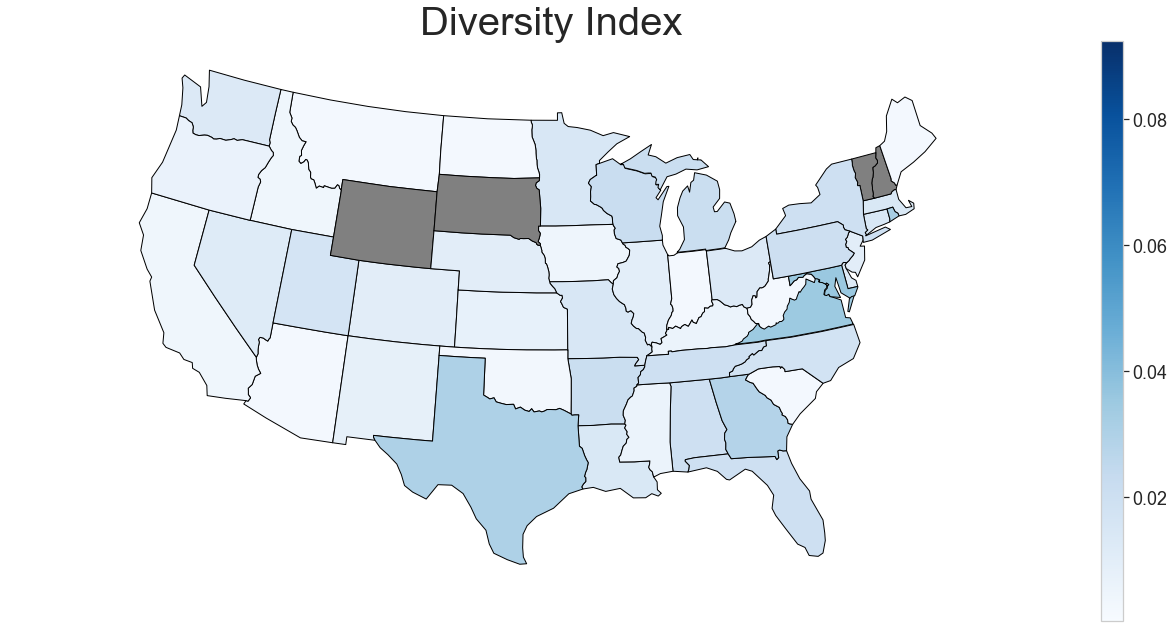

<Figure size 432x288 with 0 Axes>

In [79]:
# cm = 'inferno'
cm = 'Blues'
pal = sns.color_palette(cm, n_colors=n)

# Create the mpl axes of a PlateCarree map
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title(ofinterest.title(), fontsize=40)

for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        facecolor = pal[DATA.loc[astate.attributes["postal"], "stat"]]
    except:
        facecolor = "gray"

#     # simple scheme to assign color to each state
#     if state_dens < 40:
#         facecolor = "lightyellow"
#     elif state_dens > 200:
#         facecolor = "red"
#     else:
#         facecolor = "pink"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="2%", pad=0.1, axes_class=plt.Axes)
norm = mpl.colors.Normalize(vmin=DATA["DIVERSITY INDEX"].min(),vmax=DATA["DIVERSITY INDEX"].max())
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig.add_axes(ax_cb)
cb = plt.colorbar(sm, cax=ax_cb)
cb.ax.tick_params(labelsize=18) 
plt.show()
plt.savefig('diversity.png', dpi=500, format="png")

---